## how the classification process work

Goal: classify images into one of the 10 categories
Dataset: CIFAR-10
Model identifies features (shapes, colors, textures)

** how the classification process work**
- each image is 32*32 pixel, with RGB color channels.
- convolution layers - these layers use filters to slide
across the image and detect local patters ( shapes, edges, ...)
- pooling layers - reduce the spatial dimension of the 
image => keep the most important features and discard less
important ones
- fully connected layers - the image is flattened (converted from
2D structure to 1D vector).
- classification (softmax output) - output a vector of
probabilities

how the model makes predictions

- during the training, the model learns which features
are associated with each class
- after the training, the model uses the learnt filters
and patterns to classify the image
- output of the model: is a set of probabilities for
all 10 classes.

- horse: 0.85
- airplaine: 0.05
- dog: 0.03
- automobile: 0.02

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import pandas as pd
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels)=datasets.cifar10.load_data()

train_images, test_images= train_images /255.0, test_images /255.0 #[0,255] => [0,1]

model= models.Sequential([

    #first convolutional layer
    layers.Conv2D (32, (3,3), activation ='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D ((2,2)),

    #second convolutional layer
    layers.Conv2D (64, (3,3), activation ='relu'),
    layers.MaxPooling2D ((2,2)),

    #third convolutional layer
    layers.Conv2D (64, (3,3), activation ='relu'),

    #flatten layer
    layers.Flatten(),

    #fully connected layer
    layers.Dense(64, activation ='relu'),

    #output layer
    layers.Dense(10, activation ='softmax')
    #10 output classes for CIFAR-10

])

In [14]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3518 - loss: 1.7484 - val_accuracy: 0.4633 - val_loss: 1.5153
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5765 - loss: 1.1922 - val_accuracy: 0.6026 - val_loss: 1.1273
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6447 - loss: 1.0062 - val_accuracy: 0.6482 - val_loss: 1.0053
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6837 - loss: 0.8918 - val_accuracy: 0.6811 - val_loss: 0.9309
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7114 - loss: 0.8159 - val_accuracy: 0.6941 - val_loss: 0.8979
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7344 - loss: 0.7566 - val_accuracy: 0.7001 - val_loss: 0.8677
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7555 - loss: 0.7025 - val_accuracy: 0.6927 - val_loss: 0.8871
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7747 - loss: 

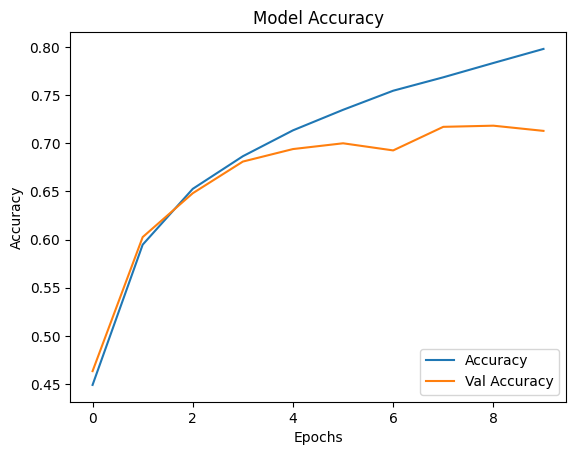

In [15]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title ('Model Accuracy')
plt.xlabel ('Epochs')
plt.ylabel ('Accuracy')
plt.legend(loc= 'lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


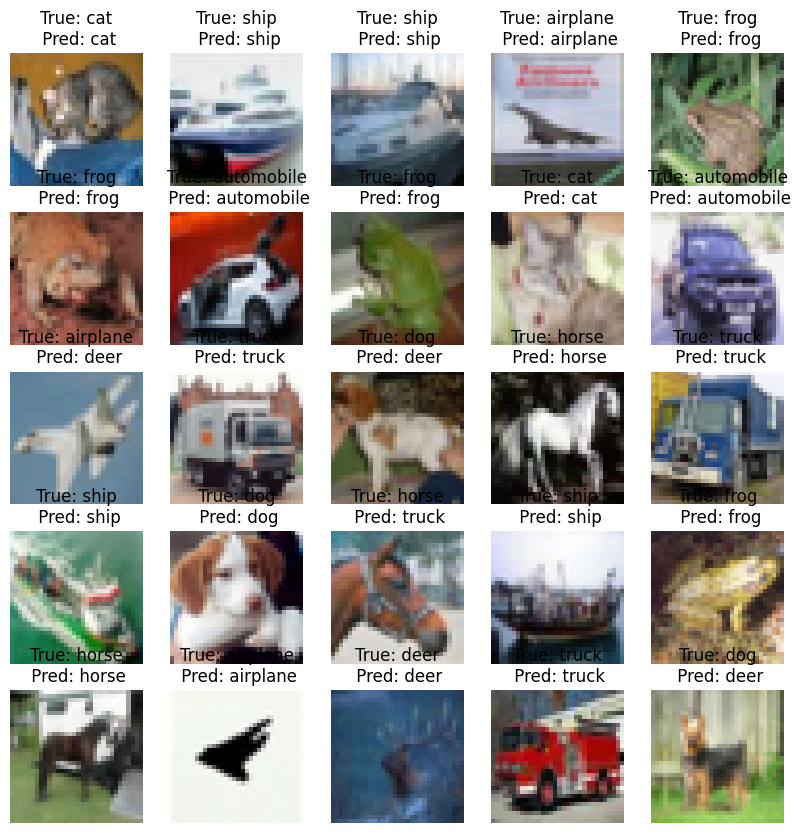

In [17]:
import numpy as np
def plot_images(images, labels, predictions, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):

        plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.axis ('off')
        true_label= class_names[labels [i][0]]
        predicted_label= class_names[predictions [i]]
        plt.title(f"True: {true_label}\n Pred: {predicted_label}")
    plt.show()

predictions= model.predict(test_images)

predicted_class_indices = np.argmax(predictions, axis=1)

class_names =['airplane', 'automobile','bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plot_images(test_images, test_labels, predicted_class_indices,class_names)